# Unsupervised ML Checkpoint

This checkpoint is designed to test your understanding of unsupervised machine learning.

Specifically, this will cover:

* Reducing dimensionality of data using Principal Component Analysis (PCA)
* Performing clustering analysis of data, including interpreting silhouette scores
* Creating visualizations using unsupervised ML

## Your Task: Use Unsupervised ML to Investigate a Sensor Dataset

### Data Understanding

You will be using a dataset ([source](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)) generated from embedded sensors (accelerometer and gyroscope) in a smartphone worn on a person's waist. Additional processing and feature engineering has already been applied to the data, including noise filters, resulting in a 561-feature vector.

In the cell below, we load the data into a `pandas` dataframe:

In [1]:
# Run this cell without changes
import pandas as pd

df = pd.read_csv("sensor_data.csv")
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


### Data Processing and Visualization

As you can see, this dataset has many features (561 total). There is also likely to be high multicollinearity between these features due to the feature engineering process, which repeatedly used some of the same raw sensor data (e.g. "tBodyAcc-mean()") to generate different columns.

Your task is to look for some underlying patterns in this data using unsupervised ML techniques, specifically PCA and k-means clustering. You do not need to perform a train-test split.

## 1. Prepare Data for Principal Component Analysis (PCA)

Instantiate a `StandardScaler` and use it to create a scaled variable called `data_scaled`.

In [2]:
# CodeGrade step1
# Replace None with appropriate code

# Import relevant class
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Create scaled variable
data_scaled = scaler.fit_transform(df)
data_scaled

# Convert data_scaled to a DataFrame for readability
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.149577,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,-0.778758,-0.876738,-0.829197,-0.591277,1.846034,0.325923,-0.878008,-0.590763,0.605162,0.380984
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,0.159241,-0.260847,-0.180290,0.166951,1.948561,-1.459501,0.849894,-0.551598,0.652468,0.381820
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,0.277877,1.034784,1.044548,0.131018,-0.599877,1.406760,1.479571,-0.565848,0.640597,0.348709
7350,0.215866,-0.028123,-0.867710,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,...,-0.443978,1.155541,0.913569,-0.326769,1.558312,1.525574,-1.220854,-0.577668,0.631478,0.293276


In [3]:
# data_scaled should have the same shape as df
assert data_scaled.shape == df.shape

# data_scaled should not be the same as df
assert data_scaled.loc[0,"angle(Z,gravityMean)"] != df.loc[0,"angle(Z,gravityMean)"]

## 2. Perform PCA on the Dataset

Using the scikit-learn `PCA` class ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)), create:

* A `PCA` object called `pca_transformer` with a `random_state` of 42 and at least 95% of the variance is explained
* A variable called `pca_data` that represents the data transformed by `pca_transformer`

In [4]:
# CodeGrade step2
# Replace None with appropriate code

# Import relevant class
from sklearn.decomposition import PCA

# Create a PCA object
pca_transformer = PCA(n_components=.95, random_state=42)

# Transform data using pca_transformer
pca_data = pca_transformer.fit_transform(data_scaled)
pca_data

array([[-16.13854371,   2.15202401,   3.14478025, ...,  -1.68153546,
         -1.20932492,  -1.17572672],
       [-15.2961943 ,   1.38714378,  -0.68222107, ...,  -1.34739246,
          0.14947399,  -0.73061489],
       [-15.13701861,   2.47335094,  -1.75664057, ...,   0.13803147,
          0.66226306,  -0.22741812],
       ...,
       [ 14.33343587, -12.26071193,   4.0259462 , ...,  -1.32974137,
         -0.08800409,  -0.09253083],
       [ 12.87601895, -14.07125595,   2.91606098, ...,  -0.79743323,
         -0.71168419,   0.56868751],
       [ 13.01610365, -12.24426121,   1.33604965, ...,  -0.043166  ,
         -0.34681818,  -0.67183662]])

In [5]:
# pca_transformer should be type PCA
assert type(pca_transformer) == PCA

In [6]:
# pca_data should be a NumPy array
import numpy as np
assert type(pca_data) == np.ndarray

# pca_data should have the same number of rows as data_scaled
assert pca_data.shape[0] == data_scaled.shape[0]

# pca_data should have fewer columns than data_scaled
assert pca_data.shape[1] < data_scaled.shape[1]

In the cell below, we plot the first and second principal components using a scatterplot. If this code doesn't work to produce a plot, that indicates that there is a problem with your code so far.

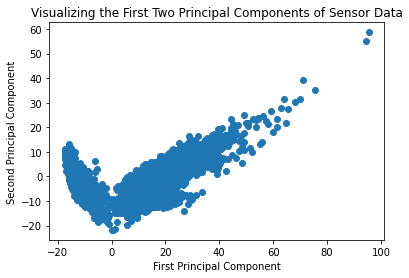

In [7]:
# Run this cell without changes
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x=pca_data[:, 0], y=pca_data[:, 1])
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_title("Visualizing the First Two Principal Components of Sensor Data");

## 3. Interpret a Silhouette Plot to Perform Clustering Analysis

You handed the PCA-transformed dataset to a coworker, who produced this silhouette plot. Interpret the plot to choose the optimal number of clusters, then use the scikit-learn `KMeans` class ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) to instantiate a KMeans model.

<!-- 
k_values = range(2,21)
silhouette_scores = [0.41540858143541637,
 0.3438069022316109,
 0.1775373667655337,
 0.1425018071505172,
 0.12365576879282861,
 0.11917044787937144,
 0.09524343091496036,
 0.09155853204663812,
 0.09410174137993227,
 0.09335504033772586,
 0.09386447654377134,
 0.09518329181757086,
 0.0864125952331548,
 0.08622712573000349,
 0.08350384589108541,
 0.07589314716366936,
 0.06926851258928322,
 0.06980908513512903,
 0.0710121422731501]

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(k_values, silhouette_scores, color="green", marker="s", )
ax.set_xticks(k_values)
ax.set_xlabel("k in KMeans")
ax.set_ylabel("Silhouette Score")
ax.set_title("Silhouette Scores for KMeans Models of Varying K Values");
-->

![plot of silhouette scores, with the highest y value at an x value of 2](silhouette_score_plot.png)

Call the model `kmeans`, and use a `random_state` of 42.

In [8]:
# CodeGrade step3
# Replace None with appropriate code

# Import relevant model
from sklearn.cluster import KMeans

# Instantiate KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model on pca_data, using the best n_clusters value as indicated by the plot above
kmeans.fit(pca_data)

kmeans

KMeans(n_clusters=4, random_state=42)

In [9]:
# kmeans should be a fitted KMeans model with as many dimensions in cluster
# centers as principal components
assert kmeans.cluster_centers_.shape[1] == pca_data.shape[1]

## 4. Update the Plot to Reflect the Clusters

Use the `kmeans` object to identify the labels for each data point in `pca_data`. Then modify the plotting code below so that the color of each dot on the scatterplot indicates which cluster the data point belongs to.

***Hint:*** The `c` keyword argument in the `scatter` method allows you to control the color of the dots.

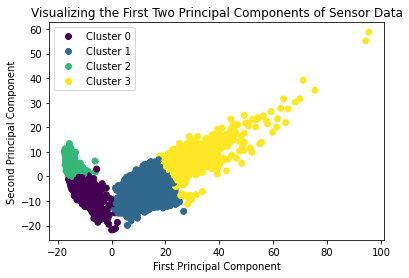

In [10]:
# CodeGrade step4
# Replace None with appropriate code
cluster_labels = kmeans.labels_

fig, ax = plt.subplots()

# Modify the below line of code to specify the color:
scatter = ax.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c=cluster_labels)

# The rest of the code can be run as-is:
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_title("Visualizing the First Two Principal Components of Sensor Data")
# Un-comment the below line to add a legend once you have specified the color
ax.legend(*scatter.legend_elements(fmt="Cluster {x:.0f}"));

In [11]:
# cluster_labels should be a NumPy array
assert type(cluster_labels) == np.ndarray

In [12]:
# Plot should have the same number of colors as kmeans has clusters
assert len(scatter.legend_elements()[0]) == kmeans.n_clusters